In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

N0

In [2]:
df = pd.read_csv('./data/1991.csv')

In [3]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
df.shape

(5076925, 29)

In [5]:
df = df.dropna('columns', how='all') # drop all na

C:\Users\User\AppData\Local\Temp\ipykernel_12776\3515641048.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns', how='all') # drop all na


N1

In [6]:
cors = df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_12776\809899695.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cors = df.corr()


In [7]:
cors

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.006707,-0.001769,-0.003813,-0.001934,-0.002384,-0.001838,0.016787,0.001087,0.002217,-0.028631,-0.029289,0.010559,-0.031704,-0.006695
DayofMonth,NaN,0.006707,1.000000,0.005891,-0.002353,-0.001550,-0.001718,-0.001005,0.001378,0.000853,0.001193,-0.005526,-0.005544,0.001125,-0.011076,-0.000952
DayOfWeek,NaN,-0.001769,0.005891,1.000000,0.005262,0.003906,0.006740,0.006716,0.007402,0.009725,0.014204,0.006240,0.020536,0.014389,-0.006978,0.000521
DepTime,NaN,-0.003813,-0.002353,0.005262,1.000000,0.984100,0.793693,0.821491,0.016760,-0.046212,-0.043425,0.108290,0.128147,-0.050281,NaN,0.002173
CRSDepTime,NaN,-0.001934,-0.001550,0.003906,0.984100,1.000000,0.785386,0.819418,0.018151,-0.050496,-0.046813,0.077316,0.095680,-0.053210,-0.003737,-0.001116
ArrTime,NaN,-0.002384,-0.001718,0.006740,0.793693,0.785386,1.000000,0.944741,0.011021,0.058332,0.056374,0.070468,0.071552,0.046770,NaN,NaN
CRSArrTime,NaN,-0.001838,-0.001005,0.006716,0.821491,0.819418,0.944741,1.000000,0.009707,0.059340,0.061840,0.081904,0.095566,0.052129,-0.007040,0.000519
FlightNum,NaN,0.016787,0.001378,0.007402,0.016760,0.018151,0.011021,0.009707,1.000000,-0.166403,-0.169189,-0.016325,-0.024913,-0.172730,0.000292,-0.005367
ActualElapsedTime,NaN,0.001087,0.000853,0.009725,-0.046212,-0.050496,0.058332,0.059340,-0.166403,1.000000,0.984070,0.107073,0.057504,0.973699,NaN,NaN


In [8]:
corsAbs = cors.abs()
corsAbs.unstack().sort_values(ascending=False)[15:35:2]

CRSElapsedTime  Distance             0.985106
CRSDepTime      DepTime              0.984100
CRSElapsedTime  ActualElapsedTime    0.984070
Distance        ActualElapsedTime    0.973699
CRSArrTime      ArrTime              0.944741
DepTime         CRSArrTime           0.821491
CRSArrTime      CRSDepTime           0.819418
ArrTime         DepTime              0.793693
CRSDepTime      ArrTime              0.785386
DepDelay        ArrDelay             0.783604
dtype: float64

In [9]:
descriptions = pd.read_csv("./data/variable-descriptions.csv")
descriptions

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


N2

<AxesSubplot: xlabel='UniqueCarrier'>

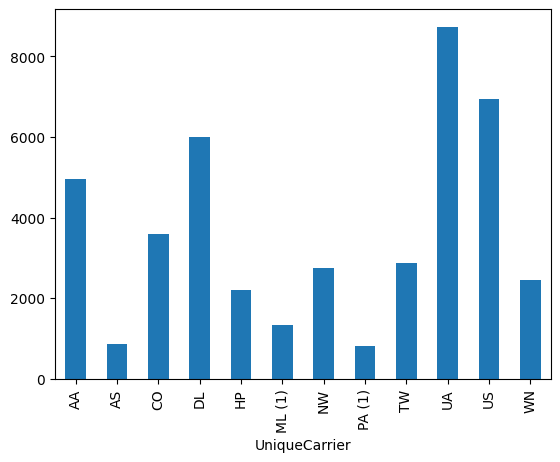

In [10]:
carrier_counts = df.groupby('UniqueCarrier')['Cancelled'].sum()
carrier_counts.plot(kind='bar', x='UniqueCarrier', y='Cancelled')

In [11]:
carrier_counts

UniqueCarrier
AA        4951
AS         858
CO        3600
DL        5990
HP        2204
ML (1)    1342
NW        2741
PA (1)     825
TW        2871
UA        8732
US        6932
WN        2459
Name: Cancelled, dtype: int64

In [12]:
df['Cancelled'].value_counts()

0    5033420
1      43505
Name: Cancelled, dtype: int64

In [13]:
name_parser = pd.read_csv('./data/carriers.csv')

In [14]:
df = df.merge(name_parser, left_on='UniqueCarrier', right_on='Code')

In [15]:
df = df.drop('Code', axis=1)

<AxesSubplot: >

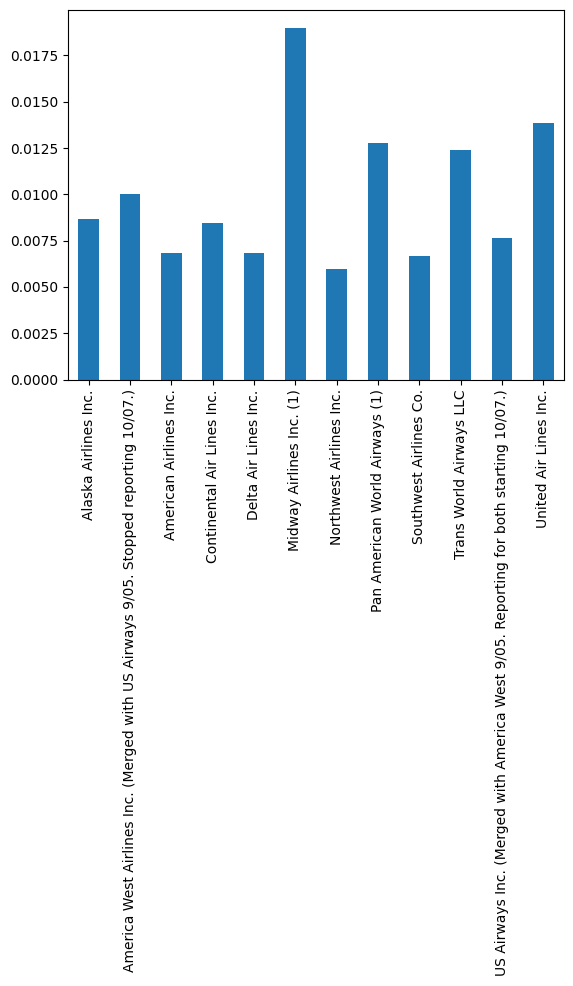

In [16]:
carrier_counts = df.groupby('Description')['Cancelled'].sum().divide(df['Description'].value_counts())
carrier_counts.plot(kind='bar', x='Description')

N3

In [17]:
df_q3 = df[df['DayofMonth'] == 1]

carrier_counts = df_q3.groupby('UniqueCarrier').size()



In [18]:
most_popular_carrier = carrier_counts.nlargest(1)

most_popular_flights = df_q3[df_q3['UniqueCarrier'] == most_popular_carrier.index[0]]

top_delayed_flights = most_popular_flights.sort_values('ArrDelay', ascending=False).head(10)

print(top_delayed_flights)

        Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
775828  1991     11           1          5   1712.0        1105   1830.0   
844508  1991     12           1          7   1859.0        1340   2101.0   
902558  1991     12           1          7   2121.0        1530   2300.0   
148816  1991      2           1          5     16.0        1955    249.0   
795996  1991     11           1          5   2157.0        1745   2308.0   
793524  1991     11           1          5   2338.0        1940    215.0   
812870  1991     11           1          5   2220.0        1910    117.0   
778759  1991     11           1          5   1951.0        1755   2151.0   
805562  1991     11           1          5   1702.0        1400   1822.0   
129979  1991      2           1          5   2134.0        1900   2327.0   

        CRSArrTime UniqueCarrier  FlightNum  ActualElapsedTime  \
775828        1212            US        339              138.0   
844508        1446            U

N4

In [19]:
def get_departures_format(row):
    if row['Cancelled'] == 0:
        month =  str(row['DayofMonth'])
        if len(month) < 2:
            month = '0' + month
        day = str(row['DayofMonth'])
        if len(day) < 2:
            day = '0' + day
        time = str(row['DepTime'])
        if len(time) < 4:  # my data had Deptime as HHMM but column type was float, so i got to add 0
            time = '0' + time
        return f"{row['Year']}-{month}-{day} {time[0:2]}:{time[2:4]}"
    else:
        return pd.NA

In [20]:
df['DepDatetime'] = df.apply(get_departures_format, axis=1)

N5

<AxesSubplot: title={'center': 'Hist of ArrDelay'}, ylabel='Frequency'>

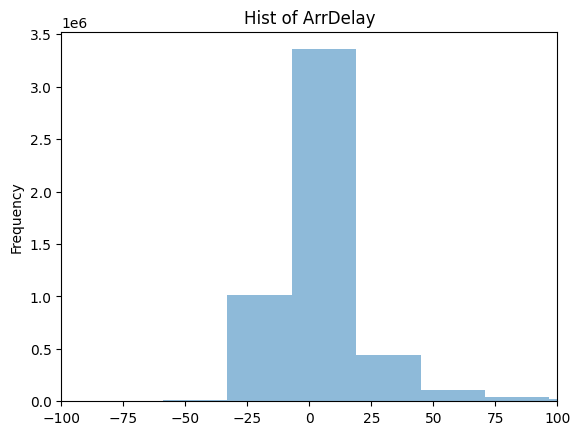

In [21]:
df['ArrDelay'].plot(kind='hist', bins=100, alpha=0.5, title='Hist of ArrDelay', xlim=[-100, 100])

<AxesSubplot: title={'center': 'Hist of DepDelay'}, ylabel='Frequency'>

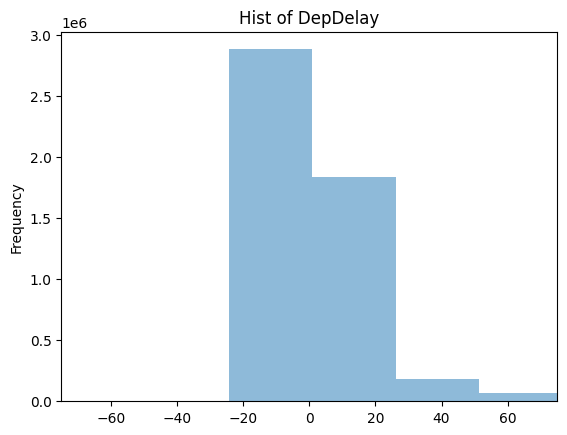

In [22]:
df['DepDelay'].plot(kind='hist', bins=100, alpha=0.5, title='Hist of DepDelay', xlim=[-75, 75], density=False)

N6

1          AxesSubplot(0.1,0.736957;0.235294x0.163043)
2     AxesSubplot(0.382353,0.736957;0.235294x0.163043)
3     AxesSubplot(0.664706,0.736957;0.235294x0.163043)
4          AxesSubplot(0.1,0.541304;0.235294x0.163043)
5     AxesSubplot(0.382353,0.541304;0.235294x0.163043)
6     AxesSubplot(0.664706,0.541304;0.235294x0.163043)
7          AxesSubplot(0.1,0.345652;0.235294x0.163043)
8     AxesSubplot(0.382353,0.345652;0.235294x0.163043)
9     AxesSubplot(0.664706,0.345652;0.235294x0.163043)
10             AxesSubplot(0.1,0.15;0.235294x0.163043)
11        AxesSubplot(0.382353,0.15;0.235294x0.163043)
12        AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

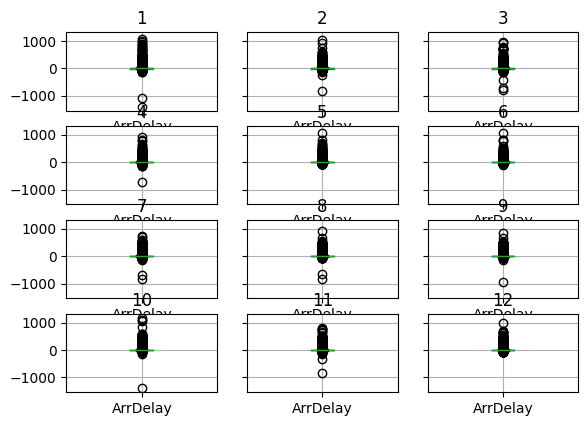

In [23]:
df.groupby(by='Month').boxplot(True, column='ArrDelay')

1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
5    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
6    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
7             AxesSubplot(0.1,0.15;0.235294x0.220588)
dtype: object

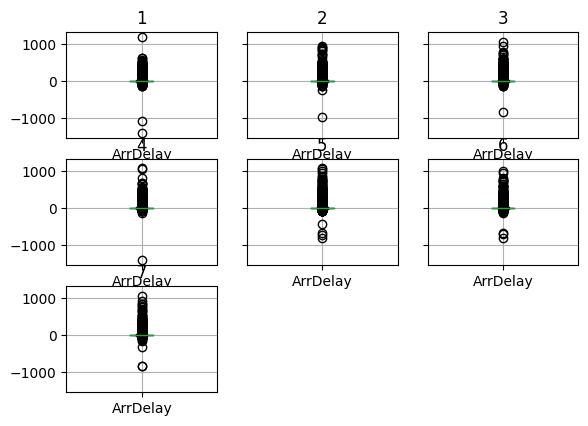

In [24]:
df.groupby(by='DayOfWeek').boxplot(True, column='ArrDelay')

In [25]:
df.groupby(by='DayOfWeek')['ArrDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,739793.0,3.391235,20.241400,-1410.0,-6.0,0.0,8.0,1188.0
2,749400.0,4.168541,22.125701,-960.0,-6.0,0.0,8.0,938.0
3,736524.0,5.377385,22.525047,-838.0,-6.0,1.0,10.0,1046.0
4,731571.0,6.018254,22.549292,-1395.0,-5.0,1.0,10.0,1088.0
5,729834.0,6.789780,25.479435,-794.0,-5.0,1.0,11.0,1082.0
6,645638.0,3.186903,21.622173,-818.0,-7.0,-1.0,8.0,997.0
7,688075.0,4.028397,22.123027,-835.0,-7.0,0.0,9.0,1063.0


0           AxesSubplot(0.1,0.77069;0.137931x0.12931)
1      AxesSubplot(0.265517,0.77069;0.137931x0.12931)
2      AxesSubplot(0.431034,0.77069;0.137931x0.12931)
3      AxesSubplot(0.596552,0.77069;0.137931x0.12931)
4      AxesSubplot(0.762069,0.77069;0.137931x0.12931)
5          AxesSubplot(0.1,0.615517;0.137931x0.12931)
6     AxesSubplot(0.265517,0.615517;0.137931x0.12931)
7     AxesSubplot(0.431034,0.615517;0.137931x0.12931)
8     AxesSubplot(0.596552,0.615517;0.137931x0.12931)
9     AxesSubplot(0.762069,0.615517;0.137931x0.12931)
10         AxesSubplot(0.1,0.460345;0.137931x0.12931)
11    AxesSubplot(0.265517,0.460345;0.137931x0.12931)
12    AxesSubplot(0.431034,0.460345;0.137931x0.12931)
13    AxesSubplot(0.596552,0.460345;0.137931x0.12931)
14    AxesSubplot(0.762069,0.460345;0.137931x0.12931)
15         AxesSubplot(0.1,0.305172;0.137931x0.12931)
16    AxesSubplot(0.265517,0.305172;0.137931x0.12931)
17    AxesSubplot(0.431034,0.305172;0.137931x0.12931)
18    AxesSubplot(0.596552,0

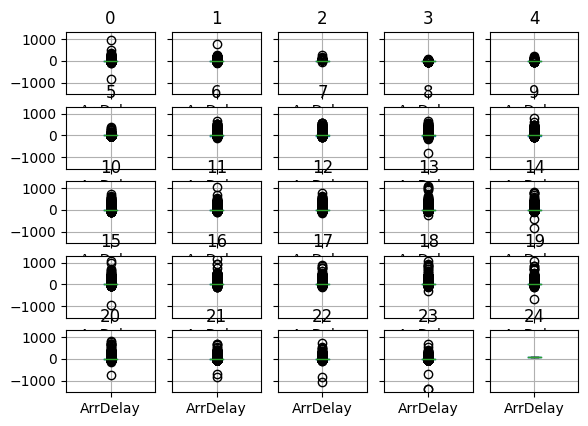

In [26]:
df.groupby(by=df['CRSDepTime'] // 100).boxplot(True, column='ArrDelay')

AA             AxesSubplot(0.1,0.736957;0.235294x0.163043)
AS        AxesSubplot(0.382353,0.736957;0.235294x0.163043)
CO        AxesSubplot(0.664706,0.736957;0.235294x0.163043)
DL             AxesSubplot(0.1,0.541304;0.235294x0.163043)
HP        AxesSubplot(0.382353,0.541304;0.235294x0.163043)
ML (1)    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
NW             AxesSubplot(0.1,0.345652;0.235294x0.163043)
PA (1)    AxesSubplot(0.382353,0.345652;0.235294x0.163043)
TW        AxesSubplot(0.664706,0.345652;0.235294x0.163043)
UA                 AxesSubplot(0.1,0.15;0.235294x0.163043)
US            AxesSubplot(0.382353,0.15;0.235294x0.163043)
WN            AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

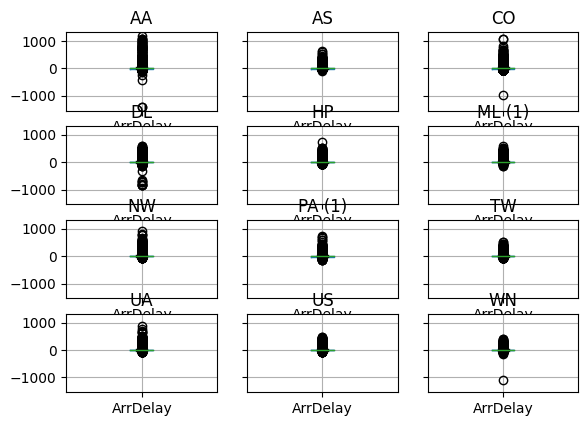

In [27]:
df.groupby(by='UniqueCarrier').boxplot(True, column='ArrDelay')

In [28]:
df.columns # check if you have TailNum coulmn

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'Cancelled', 'Diverted', 'Description',
       'DepDatetime'],
      dtype='object')

In [1]:
planes  = pd.read_csv('./data/plane-data.csv')
df = df.merge(planes, left_on='TailNum', right_on='tailnum')

NameError: name 'pd' is not defined

In [ ]:
delay_counts = df.groupby('year')['DepDelay'].count()
delay_counts.plot(kind='bar', x='DepDelay')